<a href="https://colab.research.google.com/github/aliashanavas/sample/blob/main/Socialmedia_addiction_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
df = pd.read_csv("socialmedia.csv")

In [ ]:
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,4942,35,Male,Germany,3.24,3.01,5,TikTok,3.48,2.68,...,44.0,3.67,Yes,5.0,Smartphone,10GB,Low,1.0,4.0,196.62
1,51776,53,Female,Canada,5.31,0.87,4,TikTok,1.23,0.83,...,16.0,3.68,Yes,4.0,Smartphone,Unlimited,Low,6.0,6.0,359.32
2,115254,39,Female,USA,2.89,3.93,2,TikTok,0.71,5.19,...,30.0,0.76,Yes,2.0,PC,Unlimited,High,3.0,4.0,309.52
3,299322,24,Female,USA,4.51,1.14,4,Facebook,0.64,4.40,...,43.0,0.75,Yes,9.0,Tablet,50GB,Low,1.0,9.0,446.42
4,173571,32,Male,Germany,7.58,4.28,5,Twitter,4.51,3.02,...,42.0,1.87,No,7.0,Tablet,Unlimited,High,7.0,5.0,113.32


In [ ]:
df.tail()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
14654,143975,49,Other,Australia,3.21,2.54,3,Twitter,1.22,2.22,...,5.0,4.36,No,8.0,Tablet,Unlimited,Moderate,5.0,2.0,131.15
14655,264349,25,Male,India,6.49,7.81,1,Facebook,0.25,0.80,...,19.0,1.85,Yes,9.0,Tablet,Unlimited,Low,3.0,4.0,233.00
14656,71810,24,Female,Australia,2.05,7.65,4,YouTube,4.71,4.09,...,10.0,0.77,No,3.0,Tablet,50GB,High,9.0,1.0,173.81
14657,257074,48,Male,Canada,1.29,6.99,2,TikTok,0.24,1.03,...,24.0,3.12,Yes,3.0,Smart TV,Unlimited,High,3.0,9.0,490.36
14658,94160,45,Male,USA,5.36,3.16,1,YouTube,3.28,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Country', 'Daily Social Media Time (hrs)',
       'Daily Entertainment Time (hrs)', 'Social Media Platforms Used',
       'Primary Platform', 'Daily Messaging Time (hrs)',
       'Daily Video Content Time (hrs)', 'Daily Gaming Time (hrs)',
       'Occupation', 'Marital Status', 'Monthly Income (USD)', 'Device Type',
       'Internet Speed (Mbps)', 'Subscription Platforms',
       'Average Sleep Time (hrs)', 'Physical Activity Time (hrs)',
       'Reading Time (hrs)', 'Work/Study Time (hrs)', 'Screen Time (hrs)',
       'Notifications Received Daily', 'Daily Music Listening Time (hrs)',
       'Preferred Content Type', 'Primary Social Media Goal',
       'Preferred Entertainment Platform',
       'Time Spent in Online Communities (hrs)',
       'Social Media Fatigue Level (scale 1-10)',
       'News Consumption Time (hrs)', 'Ad Interaction Count',
       'Time on Educational Platforms (hrs)', 'Parental Status',
       'Tech Savviness Level (scale 1-10

In [ ]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Country,0
Daily Social Media Time (hrs),0
Daily Entertainment Time (hrs),0
Social Media Platforms Used,0
Primary Platform,0
Daily Messaging Time (hrs),0
Daily Video Content Time (hrs),0


In [ ]:
df.dtypes

,0
User ID,int64
Age,int64
Gender,object
Country,object
Daily Social Media Time (hrs),float64
Daily Entertainment Time (hrs),float64
Social Media Platforms Used,int64
Primary Platform,object
Daily Messaging Time (hrs),float64
Daily Video Content Time (hrs),float64


In [ ]:

df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(['User ID','Country', 'Marital Status','Device Type',
       'Internet Speed (Mbps)','Parental Status','Data Plan Used','Preferred Device for Entertainment'],inplace=True,axis=1)

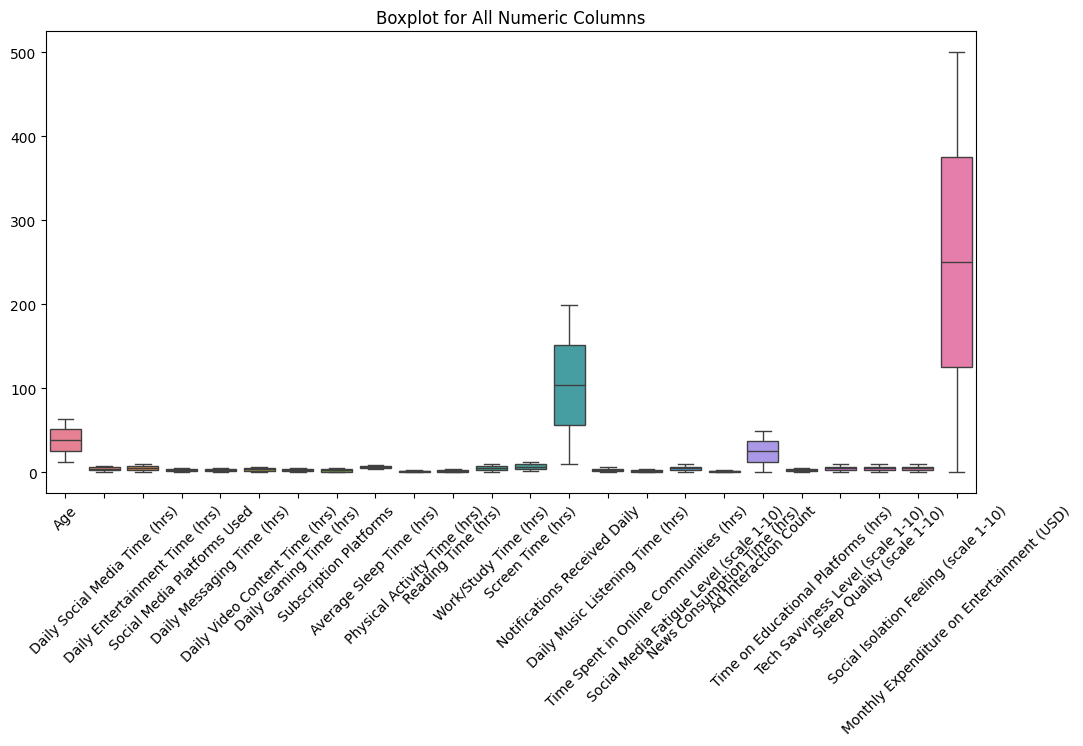

In [ ]:
numeric_cols = df.select_dtypes(include=["number"]).drop(columns=["Monthly Income (USD)"])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title("Boxplot for All Numeric Columns")
plt.show()

In [ ]:
print(df[['Ad Interaction Count', 'Notifications Received Daily','Monthly Expenditure on Entertainment (USD)']].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]))


       Ad Interaction Count  Notifications Received Daily  \
count          14658.000000                  14658.000000   
mean              24.673694                    104.294378   
std               14.441948                     55.120816   
min                0.000000                     10.000000   
1%                 0.000000                     11.000000   
25%               12.000000                     56.000000   
50%               25.000000                    104.000000   
75%               37.000000                    152.000000   
99%               49.000000                    198.000000   
max               49.000000                    199.000000   

       Monthly Expenditure on Entertainment (USD)  
count                                14658.000000  
mean                                   250.142388  
std                                    144.603431  
min                                      0.040000  
1%                                       4.515700  
25%             

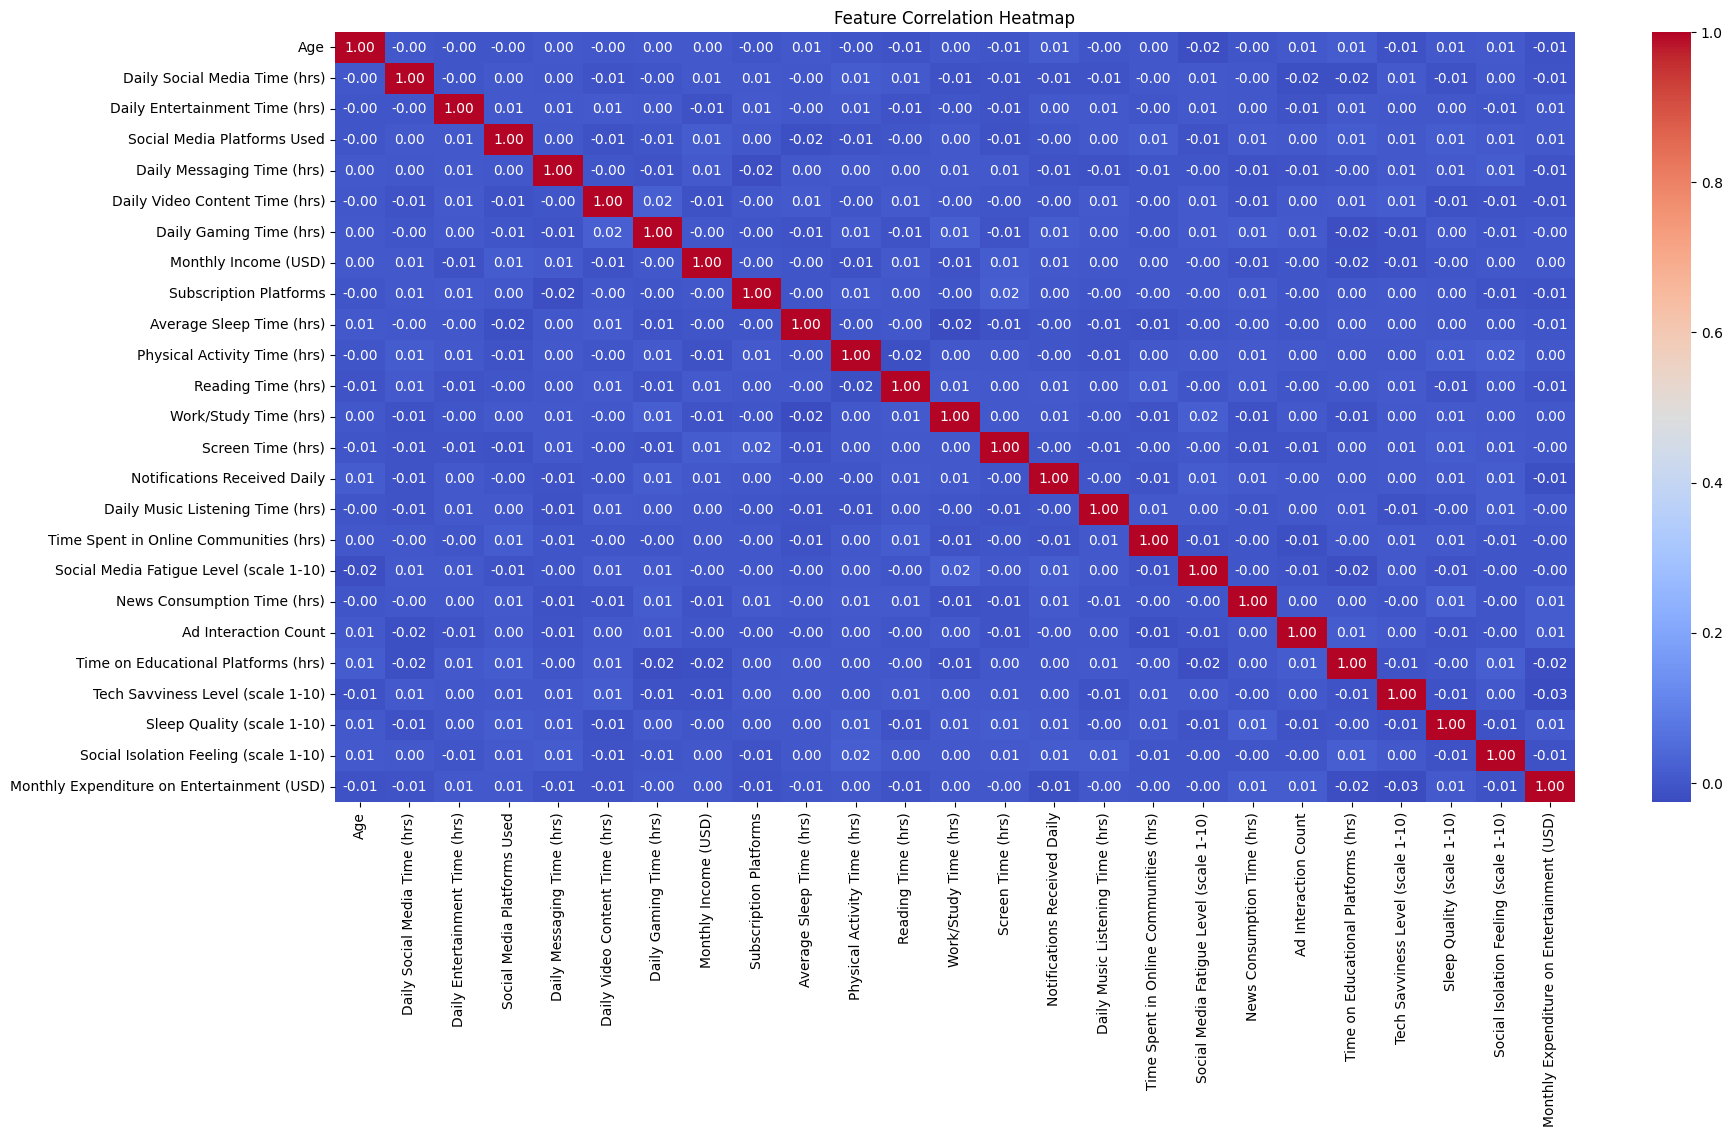

In [ ]:

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr() ,annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]
print(correlation_pairs.head(10))

Daily Video Content Time (hrs)           Daily Gaming Time (hrs)                    0.018561
Daily Gaming Time (hrs)                  Daily Video Content Time (hrs)             0.018561
Physical Activity Time (hrs)             Social Isolation Feeling (scale 1-10)      0.016675
Social Isolation Feeling (scale 1-10)    Physical Activity Time (hrs)               0.016675
Subscription Platforms                   Screen Time (hrs)                          0.016024
Screen Time (hrs)                        Subscription Platforms                     0.016024
Social Media Fatigue Level (scale 1-10)  Work/Study Time (hrs)                      0.015041
Work/Study Time (hrs)                    Social Media Fatigue Level (scale 1-10)    0.015041
Sleep Quality (scale 1-10)               News Consumption Time (hrs)                0.014987
News Consumption Time (hrs)              Sleep Quality (scale 1-10)                 0.014987
dtype: float64


In [ ]:
primary_plaform=df["Primary Platform"].value_counts()
primary_plaform

,count
Primary Platform,
Facebook,3018
TikTok,2971
Twitter,2939
Instagram,2903
YouTube,2828


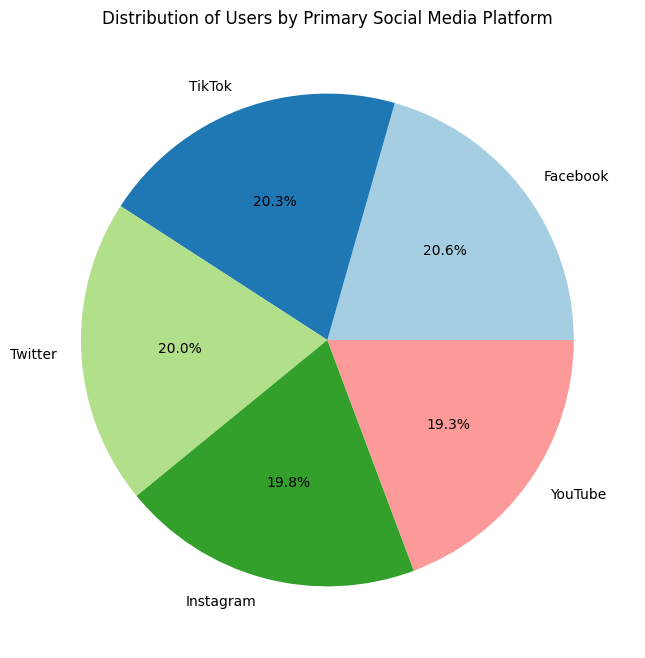

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(primary_plaform, labels=primary_plaform.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors  )

plt.title("Distribution of Users by Primary Social Media Platform")
plt.show()

In [ ]:
content_preferred=df["Preferred Content Type"].value_counts()
content_preferred

,count
Preferred Content Type,
Short Videos,3698
Movies,3679
Series,3662
News,3619


Text(0.5, 1.0, 'Distribution of Users by preferred Content Type')

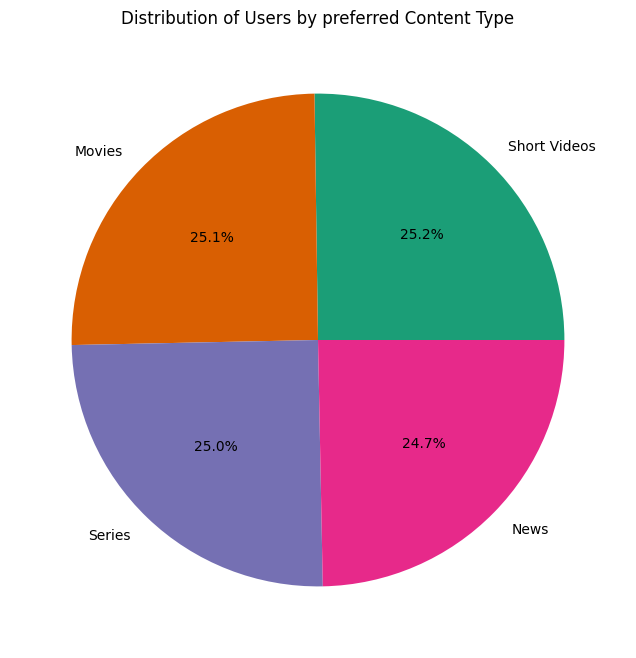

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(content_preferred,labels=content_preferred.index,autopct="%1.1f%%",colors=plt.cm.Dark2.colors)
plt.title("Distribution of Users by preferred Content Type")

In [ ]:
entertainmentplatform_preferred=df["Preferred Entertainment Platform"].value_counts()

([<matplotlib.patches.Wedge at 0x786355084dd0>,
 [Text(0.7652991655761474, 0.7901374482762178, 'YouTube'),
  Text(-0.7995895503324291, 0.7554181299116298, 'Spotify'),
  Text(-0.7613948919064678, -0.7939003832841613, 'Netflix'),
  Text(0.7843745852311013, -0.7712045837801653, 'Amazon Prime')],
 [Text(0.41743590849608037, 0.4309840626961187, '25.5%'),
  Text(-0.43613975472677946, 0.41204625267907075, '24.9%'),
  Text(-0.4153063046762551, -0.43303657270045165, '24.9%'),
  Text(0.42784068285332794, -0.42065704569827195, '24.7%')])

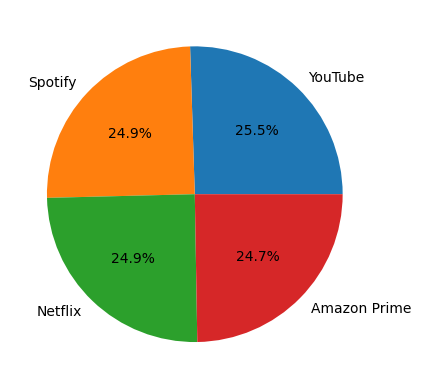

In [ ]:
plt.pie(x=entertainmentplatform_preferred,labels=entertainmentplatform_preferred.index,autopct="%1.1f%%")

In [ ]:
socialmedia_goal=df["Primary Social Media Goal"].value_counts()

([<matplotlib.patches.Wedge at 0x786354ed9590>,
 [Text(0.7691848674508728, 0.7863552884571855, 'News'),
  Text(-0.8005603790934412, 0.7543892095104262, 'Networking'),
  Text(-0.7497439051607815, -0.8049124652247978, 'Entertainment'),
  Text(0.7907932074633941, -0.764621542352658, 'Education')],
 [Text(0.41955538224593053, 0.42892106643119204, '25.4%'),
  Text(-0.4366692976873316, 0.41148502336932335, '25.2%'),
  Text(-0.4089512209967899, -0.43904316284988965, '24.9%'),
  Text(0.43134174952548765, -0.4170662958287225, '24.5%')])

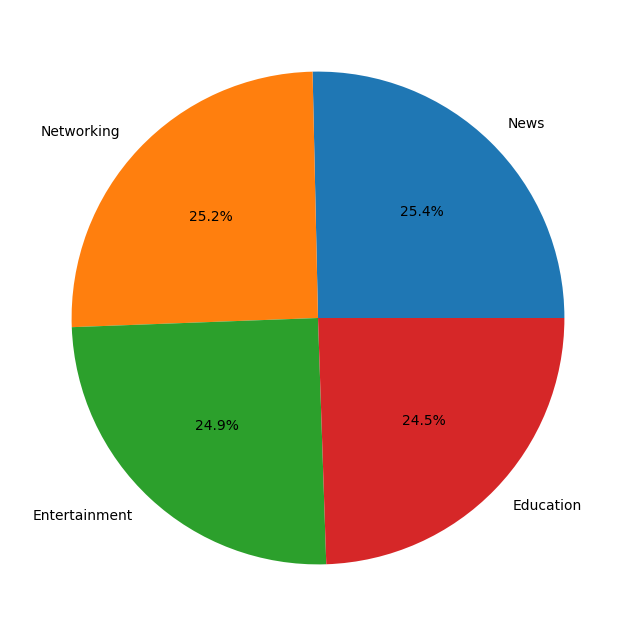

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(socialmedia_goal,labels=socialmedia_goal.index, autopct='%1.1f%%' )

In [ ]:
wellbeing_awareness=df["Digital Well-being Awareness"].value_counts()
print(wellbeing_awareness)

Digital Well-being Awareness
High        4936
Moderate    4901
Low         4821
Name: count, dtype: int64


<BarContainer object of 3 artists>

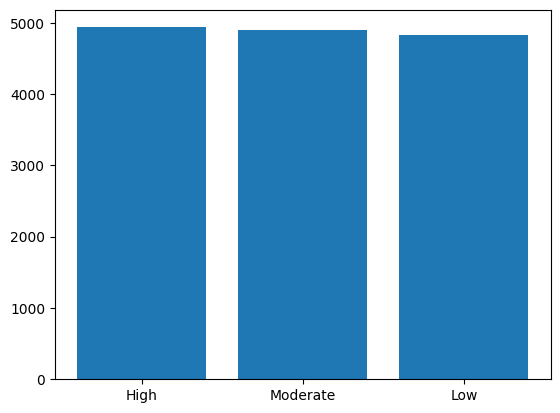

In [ ]:
plt.bar(x=wellbeing_awareness.index,height=wellbeing_awareness.values)

In [ ]:
# Encode Digital Well-being Awareness
lab= LabelEncoder()
df["Digital Well-being Awareness"] = lab.fit_transform(df["Digital Well-being Awareness"])

In [ ]:
df["Engagement Ratio"] = df["Daily Social Media Time (hrs)"] / df["Screen Time (hrs)"]
df["Messaging vs. Social Ratio"] = df["Daily Messaging Time (hrs)"] / df["Daily Social Media Time (hrs)"]
df["Fatigue & Isolation Impact"] = df["Social Isolation Feeling (scale 1-10)"] * df["Social Media Fatigue Level (scale 1-10)"]
df["Sleep Disruption Score"] = (10 - df["Sleep Quality (scale 1-10)"]) * df["Daily Social Media Time (hrs)"]
df["Ad Interaction Rate"] = df["Ad Interaction Count"] / df["Daily Social Media Time (hrs)"]
df["Notification Dependency"] = df["Notifications Received Daily"] / df["Daily Social Media Time (hrs)"]

In [ ]:
df["Addiction Score"] = (
    df["Engagement Ratio"] * 0.25 +
    df["Messaging vs. Social Ratio"] * 0.15 +
    df["Fatigue & Isolation Impact"] * 0.2 +
    df["Sleep Disruption Score"] * 0.15 +
    df["Ad Interaction Rate"] * 0.1 +
    df["Notification Dependency"] * 0.15
)

In [ ]:

low_threshold = df["Addiction Score"].quantile(0.33)
moderate_threshold = df["Addiction Score"].quantile(0.66)

df["Social Media Addiction"] = np.select(
[df["Addiction Score"] < low_threshold, df["Addiction Score"] < moderate_threshold], ["Low", "Moderate"],default="High"
)

In [ ]:
addiction_mapping = {"Low": 0, "Moderate": 1, "High": 2}

df["Social Media Addiction"] = df["Social Media Addiction"].map(addiction_mapping)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols=["Gender","Preferred Content Type","Primary Social Media Goal","Preferred Entertainment Platform","Primary Platform","Occupation"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_data = encoder.fit_transform(df[categorical_cols])


In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [ ]:
corr_matrix = df.corr()
correlation_with_addiction = corr_matrix["Social Media Addiction"].sort_values(ascending=False)

print(correlation_with_addiction)

Social Media Addiction                        1.000000
Addiction Score                               0.772601
Fatigue & Isolation Impact                    0.615613
Notification Dependency                       0.470710
Social Media Fatigue Level (scale 1-10)       0.416895
Social Isolation Feeling (scale 1-10)         0.409146
Notifications Received Daily                  0.380131
Ad Interaction Rate                           0.296817
Messaging vs. Social Ratio                    0.275268
Sleep Disruption Score                        0.073060
Ad Interaction Count                          0.058935
Preferred Content Type_News                   0.019998
Daily Music Listening Time (hrs)              0.019743
Work/Study Time (hrs)                         0.014561
Daily Messaging Time (hrs)                    0.010550
Daily Entertainment Time (hrs)                0.010359
Primary Social Media Goal_nan                 0.009989
Preferred Entertainment Platform_nan          0.009989
Preferred 

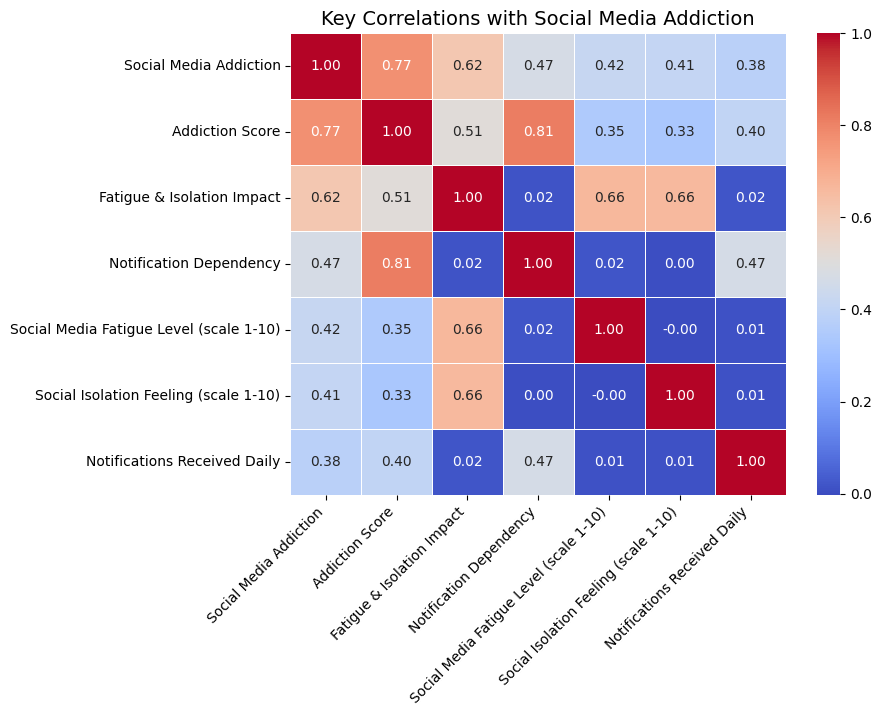

In [ ]:
correlation_matrix = df.corr()
social_media_corr = correlation_matrix["Social Media Addiction"].sort_values(ascending=False)

strong_corr_features = social_media_corr[abs(social_media_corr) > 0.3].index
plt.figure(figsize=(8, 6))
sns.heatmap(df[strong_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Key Correlations with Social Media Addiction", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
selected_features = ["Notifications Received Daily", "Ad Interaction Count",
"Daily Social Media Time (hrs)", "Social Media Fatigue Level (scale 1-10)",
"Social Media Platforms Used", "Daily Messaging Time (hrs)","Digital Well-being Awareness","Sleep Quality (scale 1-10)",
"Social Isolation Feeling (scale 1-10)", "Screen Time (hrs)"]

In [ ]:
x=df[selected_features]
x

,Notifications Received Daily,Ad Interaction Count,Daily Social Media Time (hrs),Social Media Fatigue Level (scale 1-10),Social Media Platforms Used,Daily Messaging Time (hrs),Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Screen Time (hrs)
0,74.0,44.0,3.24,4.0,5,3.48,1,1.0,4.0,3.48
1,22.0,16.0,5.31,9.0,4,1.23,1,6.0,6.0,4.01
2,65.0,30.0,2.89,3.0,2,0.71,0,3.0,4.0,7.15
3,133.0,43.0,4.51,9.0,4,0.64,1,1.0,9.0,5.83
4,160.0,42.0,7.58,3.0,5,4.51,0,7.0,5.0,6.49
...,...,...,...,...,...,...,...,...,...,...
14654,163.0,5.0,3.21,5.0,3,1.22,2,5.0,2.0,8.07
14655,173.0,19.0,6.49,2.0,1,0.25,1,3.0,4.0,5.17
14656,119.0,10.0,2.05,6.0,4,4.71,0,9.0,1.0,7.54
14657,123.0,24.0,1.29,7.0,2,0.24,0,3.0,9.0,8.27


In [ ]:
y=df['Social Media Addiction']
y

,Social Media Addiction
0,1
1,1
2,0
3,2
4,0
...,...
14654,1
14655,1
14656,0
14657,2


In [ ]:
y.value_counts()

,count
Social Media Addiction,
2,4985
1,4837
0,4837


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Predictions
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.9401
Testing Accuracy: 0.8465

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       958
           1       0.75      0.79      0.77       945
           2       0.91      0.87      0.89      1029

    accuracy                           0.85      2932
   macro avg       0.85      0.85      0.85      2932
weighted avg       0.85      0.85      0.85      2932


Confusion Matrix:
[[839 114   5]
 [112 751  82]
 [  2 135 892]]


In [ ]:
rf = RandomForestClassifier(n_estimators=200,random_state=42, max_depth=10, min_samples_split=5)
rf.fit(x_train, y_train)
ytest_pred_rf = rf.predict(x_test)
ytrain_pred_rf = rf.predict(x_train)

In [ ]:
train_accuracy = accuracy_score(y_train, ytrain_pred_rf)

rf_accuracy = accuracy_score(y_test, ytest_pred_rf)
print(f"testAccuracy: {rf_accuracy:.4f}")
print(f"rf train accuracy: {train_accuracy}")

testAccuracy: 0.8956
rf train accuracy: 0.9692163383644581


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, ytest_pred_rf ))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, ytest_pred_rf ))

In [ ]:
xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
xgb_model.fit(x_train,y_train)
ytest_pred_ = rf.predict(x_test)
ytrain_pred_ = rf.predict(x_train)

In [ ]:
train_accuracy = accuracy_score(y_train, ytrain_pred_)

rf_accuracy = accuracy_score(y_test, ytest_pred_)
print(f"testAccuracy: {rf_accuracy:.4f}")
print(f"rf train accuracy: {train_accuracy}")

testAccuracy: 0.8956
rf train accuracy: 0.9692163383644581
